# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from **scratch instead of using any pre-existing libraries** to do so:

(1) Count the frequency of all the N-grams (N=3) and (N=2).

(2) Calculate the probabilities for all the bigrams in the dataset by using the formula  count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative
probabilities of each review in terms of other reviews (abstracts, or tweets) by using the formula  frequency (noun phrase) / max frequency (noun phrase) on the whole dataset.

Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [ ]:
def load_data(file_path):
    data = []
    with open(file_path, encoding='utf-8') as f:
        header = f.readline().strip().split(',')
        text_index = header.index("Text")
        for line in f:
            row = line.strip().split(',')
            if len(row) > text_index:
                data.append(row[text_index])
    return data

data = load_data("Cleaned_AI_ML_Tweets.csv")

# (1) Counting the frequency of all the N-grams (N=3) and (N=2)
def preprocess_text(text):
    text = ''.join(c.lower() if c.isalnum() or c.isspace() else ' ' for c in text)
    return text.split()

def generate_ngrams(tokens, n):
    return [tuple(tokens[i:i+n]) for i in range(len(tokens)-n+1)]

def count_ngrams(data, n):
    counts = {}
    for text in data:
        tokens = preprocess_text(text)
        for ngram in generate_ngrams(tokens, n):
            counts[ngram] = counts.get(ngram, 0) + 1
    return counts

bigram_counts = count_ngrams(data, 2)
trigram_counts = count_ngrams(data, 3)

# (2)
word_counts = {}
for bigram, count in bigram_counts.items():
    word_counts[bigram[0]] = word_counts.get(bigram[0], 0) + count

bigram_probs = {bg: count / word_counts[bg[0]] for bg, count in bigram_counts.items() if word_counts[bg[0]] > 0}

# (3)
def extract_noun_phrases(text):
    words = text.split()
    noun_phrases = []
    for i in range(len(words) - 1):
        if words[i][0].isupper() and words[i+1][0].isupper():
            noun_phrases.append(words[i] + ' ' + words[i+1])
    return noun_phrases

noun_phrase_counts = {}
for text in data:
    for phrase in extract_noun_phrases(text):
        noun_phrase_counts[phrase] = noun_phrase_counts.get(phrase, 0) + 1

max_freq = max(noun_phrase_counts.values(), default=1)
noun_phrase_probs = {phrase: count / max_freq for phrase, count in noun_phrase_counts.items()}

print("Top 10 Bigrams:", sorted(bigram_counts.items(), key=lambda x: x[1], reverse=True)[:10])
print("Top 10 Trigrams:", sorted(trigram_counts.items(), key=lambda x: x[1], reverse=True)[:10])
print("Top 10 Bigram Probabilities:", sorted(bigram_probs.items(), key=lambda x: x[1], reverse=True)[:10])

print("Noun Phrase Probabilities:")
for phrase, prob in sorted(noun_phrase_probs.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"{phrase}: {prob:.4f}")

Top 10 Bigrams: [(('contact', 'me'), 6), (('me', 'now'), 6), (('for', 'hacking'), 5), (('now', 'for'), 5), (('hacking', 'or'), 5), (('recovery', 'problems'), 4), (('or', 'recovery'), 4), (('ai', 'is'), 3), (('if', 'you'), 3), (('for', 'creative'), 3)]
Top 10 Trigrams: [(('contact', 'me', 'now'), 6), (('me', 'now', 'for'), 5), (('hacking', 'or', 'recovery'), 4), (('for', 'creative', 'minds'), 3), (('creative', 'minds', 'play'), 3), (('minds', 'play', 'inside'), 3), (('play', 'inside', 'of'), 3), (('inside', 'of', 'your'), 3), (('of', 'your', 'with'), 3), (('your', 'with', 'a'), 3)]
Top 10 Bigram Probabilities: [(('please', 'click'), 1.0), (('click', 'on'), 1.0), (('understand', 'why'), 1.0), (('illusionism', 'as'), 1.0), (('as', 'a'), 1.0), (('theory', 'of'), 1.0), (('consciousness', 'is'), 1.0), (('pure', 'denialism'), 1.0), (('up', 'your'), 1.0), (('seo', 'game'), 1.0)]
Noun Phrase Probabilities:
Please Click: 1.0000
Recovery Services!: 1.0000
Academic Integrity: 1.0000
NOW. Watch: 0.

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any **pre-existing libraries** to do so.

In [ ]:
import pandas as pd

df = pd.read_csv('/content/Cleaned_AI_ML_Tweets.csv')

documents = df['Text'].dropna().astype(str).tolist()

# 1
def compute_tf(doc):
    words = doc.split()
    total_words = len(words)
    tf = {}

    for word in words:
        if word not in tf:
            tf[word] = 0
        tf[word] += 1

    for word in tf:
        tf[word] = tf[word] / total_words

    return tf

def compute_idf(documents):
    idf = {}
    N = len(documents)


    for doc in documents:
        words_in_doc = set(doc.split())
        for word in words_in_doc:
            if word not in idf:
                idf[word] = 0
            idf[word] += 1

    for word in idf:
        idf[word] = (N / (1 + idf[word])) ** 0.5

    return idf

def compute_tfidf(documents):
    idf = compute_idf(documents)
    tfidf_matrix = []

    for doc in documents:
        tf = compute_tf(doc)
        tfidf = {}
        for word, tf_value in tf.items():
            tfidf[word] = tf_value * idf.get(word, 0)  # Multiply TF and IDF
        tfidf_matrix.append(tfidf)

    return tfidf_matrix

tfidf_matrix = compute_tfidf(documents)

# 2

def cosine_similarity(vec1, vec2):
    # Find the intersection of words in both vectors
    intersection = set(vec1.keys()) & set(vec2.keys())


    numerator = sum([vec1[word] * vec2[word] for word in intersection])

    sum1 = sum([vec1[word]**2 for word in vec1])  # Magnitude of vector 1
    sum2 = sum([vec2[word]**2 for word in vec2])  # Magnitude of vector 2

    denominator = (sum1**0.5) * (sum2**0.5)

    if denominator == 0:
        return 0
    else:
        return numerator / denominator

# Query to be ranked
query = "AI and machine learning advancements in 2025"

# Computing the TF for the query
query_tf = compute_tf(query)

# Computing the TF-IDF for the query
query_tfidf = {}
idf = compute_idf(documents)
for word, tf_value in query_tf.items():
    query_tfidf[word] = tf_value * idf.get(word, 0)

# Ranking the documents based on cosine similarity with the query
similarities = []
for i, doc_tfidf in enumerate(tfidf_matrix):
    similarity = cosine_similarity(query_tfidf, doc_tfidf)
    similarities.append((i, similarity))

# Sorting documents by cosine similarity in descending order
ranked_documents = sorted(similarities, key=lambda x: x[1], reverse=True)

# Displaying the ranked documents
print("Ranking of Documents based on Cosine Similarity with the Query:")
for rank, (doc_idx, sim) in enumerate(ranked_documents, start=1):
    print(f"Rank {rank}: Document {doc_idx + 1} (Cosine Similarity: {sim:.4f})")


Ranking of Documents based on Cosine Similarity with the Query:
Rank 1: Document 36 (Cosine Similarity: 0.2665)
Rank 2: Document 3 (Cosine Similarity: 0.1221)
Rank 3: Document 6 (Cosine Similarity: 0.1085)
Rank 4: Document 18 (Cosine Similarity: 0.0922)
Rank 5: Document 35 (Cosine Similarity: 0.0826)
Rank 6: Document 2 (Cosine Similarity: 0.0759)
Rank 7: Document 17 (Cosine Similarity: 0.0546)
Rank 8: Document 27 (Cosine Similarity: 0.0503)
Rank 9: Document 25 (Cosine Similarity: 0.0465)
Rank 10: Document 19 (Cosine Similarity: 0.0420)
Rank 11: Document 22 (Cosine Similarity: 0.0420)
Rank 12: Document 32 (Cosine Similarity: 0.0420)
Rank 13: Document 14 (Cosine Similarity: 0.0381)
Rank 14: Document 12 (Cosine Similarity: 0.0373)
Rank 15: Document 4 (Cosine Similarity: 0.0334)
Rank 16: Document 34 (Cosine Similarity: 0.0308)
Rank 17: Document 33 (Cosine Similarity: 0.0269)
Rank 18: Document 31 (Cosine Similarity: 0.0243)
Rank 19: Document 5 (Cosine Similarity: 0.0235)
Rank 20: Document 1

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit or Fine tune bert model).

(2) Visualize the word embedding model you created. (PCA and T-sne)

(3) Calculate the cosine similarity between a few pairs of words to see if the model captures semantic similarity accurately.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127918 (\N{VIDEO GAME}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127756 (\N{MILKY WAY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPy

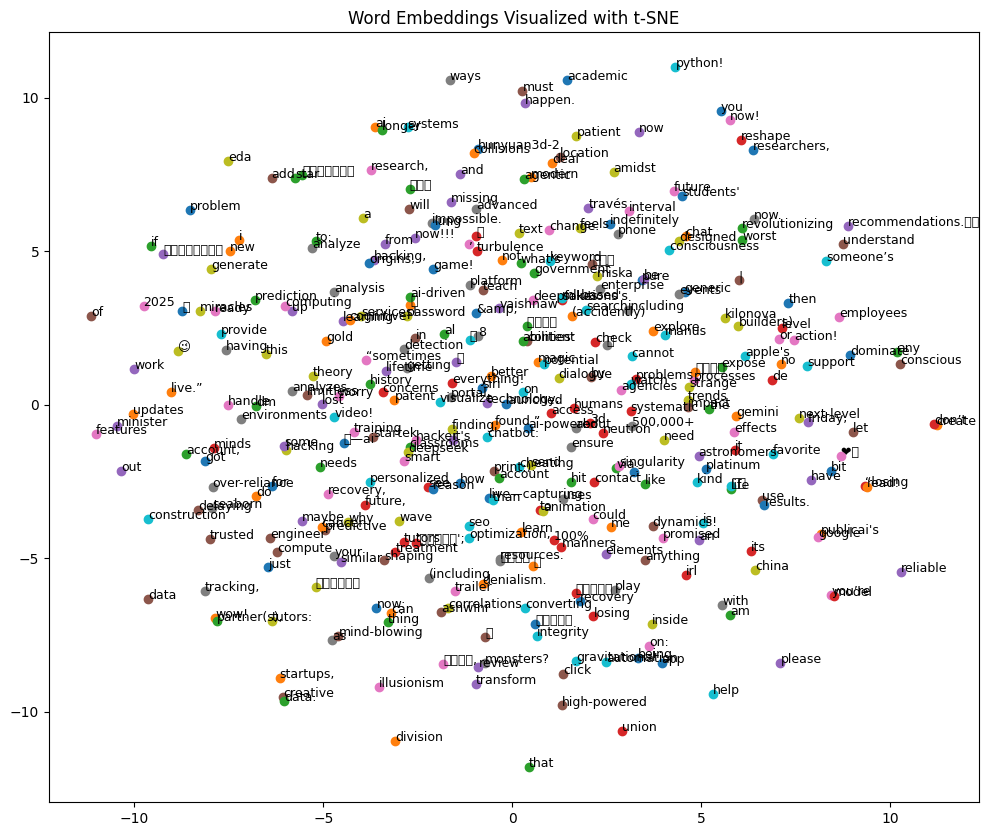

Cosine similarity between 'ai' and 'support': -0.0027
One or both words ('data', 'science') are not present in the vocabulary.
One or both words ('artificial', 'intelligence') are not present in the vocabulary.
Cosine similarity between 'model' and 'training': 0.0265
One or both words ('algorithm', 'machine') are not present in the vocabulary.


In [ ]:
import pandas as pd
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.spatial.distance import cosine

#1
df = pd.read_csv('/content/Cleaned_AI_ML_Tweets.csv')

documents = df['Text'].dropna().astype(str).tolist()

# Preprocessing the text (tokenization, lowercasing, etc.)
def preprocess_text(text):
    return text.lower().split()

# Tokenizing all the documents
tokenized_documents = [preprocess_text(doc) for doc in documents]

# Training a Word2Vec model on the tokenized documents
model = Word2Vec(tokenized_documents, vector_size=300, window=5, min_count=1, workers=4)

# Accessing word vectors
word_vectors = model.wv

#2

# Visualizing the word embeddings using PCA and t-SNE
# Reducing the dimensions using PCA first
word_embeddings = [word_vectors[word] for word in word_vectors.index_to_key]
pca = PCA(n_components=50)
pca_result = pca.fit_transform(word_embeddings)

# Reducing further to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=0)
tsne_result = tsne.fit_transform(pca_result)

plt.figure(figsize=(12, 10))
for i, word in enumerate(word_vectors.index_to_key):
    plt.scatter(tsne_result[i, 0], tsne_result[i, 1])
    plt.annotate(word, (tsne_result[i, 0], tsne_result[i, 1]), fontsize=9)

plt.title("Word Embeddings Visualized with t-SNE")
plt.show()

#3

# Defining some word pairs for cosine similarity
word_pairs = [("ai", "support"), ("data", "science"), ("artificial", "intelligence"),
              ("model", "training"), ("algorithm", "machine")]

# Checking if words exist in the vocabulary and calculate cosine similarity
for word1, word2 in word_pairs:
    if word1 in word_vectors and word2 in word_vectors:
        sim = 1 - cosine(word_vectors[word1], word_vectors[word2])
        print(f"Cosine similarity between '{word1}' and '{word2}': {sim:.4f}")
    else:
        print(f"One or both words ('{word1}', '{word2}') are not present in the vocabulary.")




## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.




1.   Which NLP Task you would like perform on your selected dataset
(NER, Summarization, Sentiment Analysis, Text classficication)
2.  Explain your labeling Schema you have used and mention those labels

3.  You can take AI assistance for labeling the data only.



In [ ]:
# The GitHub link of your final csv file


# Link: https://github.com/Swathi568/Swathi_INFO5731_2025/blob/main/Q4_imdb_reviews.csv



**Selected NLP Task**:
Sentiment Analysis & Text Classification

For this dataset, I would primarily perform Sentiment Analysis to determine the sentiment of each movie review. Additionally, I could extend this to Text Classification if we want to categorize reviews based on themes (e.g., acting, direction, storyline).

**Labeling Schema Used**

For sentiment analysis, I have used TextBlob's polarity scoring to categorize the reviews into three sentiment classes:

Positive - If the sentiment polarity is greater than 0

Negative - If the sentiment polarity is less than 0

Neutral - If the sentiment polarity is exactly 0

These labels help in training a supervised machine learning model for sentiment analysis, which could be useful for tasks like:
1. Analyzing audience reactions
2. Identifying trends in movie reviews
3. Improving movie recommendations based on sentiments

# Mandatory Question

Provide your thoughts on the assignment by filling this survey link. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
The assignment was challenging but rewarding, involving text preprocessing, N-grams, TF-IDF, cosine similarity, and word embedding visualization.